# Preparando e processando os dados

In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('../data/bicicletas.csv')

In [10]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [12]:
df.shape

(17429, 10)

In [13]:
df.isnull().sum()

data_hora            0
contagem             0
temperatura         23
sensacao_termica    23
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

In [14]:
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [15]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


In [16]:
df.duplicated().sum()

np.int64(15)

In [17]:
duplicatas = df.duplicated(keep=False)

linhas_duplicadas = df[duplicatas]

linhas_duplicadas.sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [18]:
df_limpo = df.drop_duplicates()

In [19]:
df_limpo.shape

(17414, 10)

# Explorando os dados numéricos

In [20]:
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

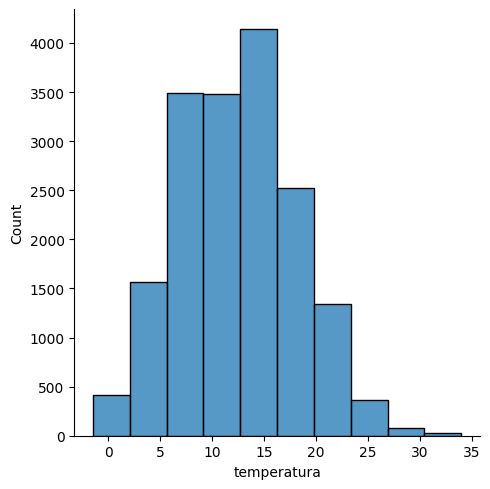

In [24]:
sns.displot(df_limpo,x='temperatura', bins=10)
plt.show()

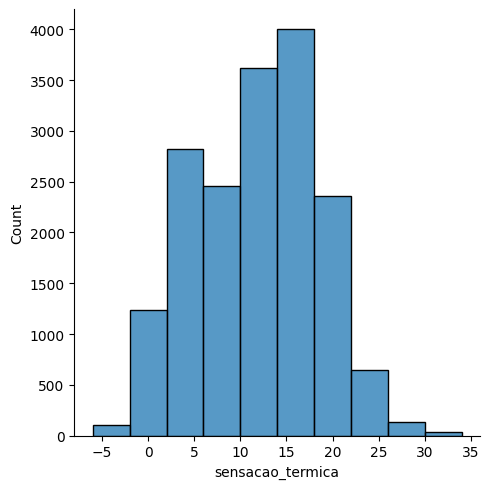

In [25]:
sns.displot(df_limpo,x='sensacao_termica', bins=10)
plt.show()

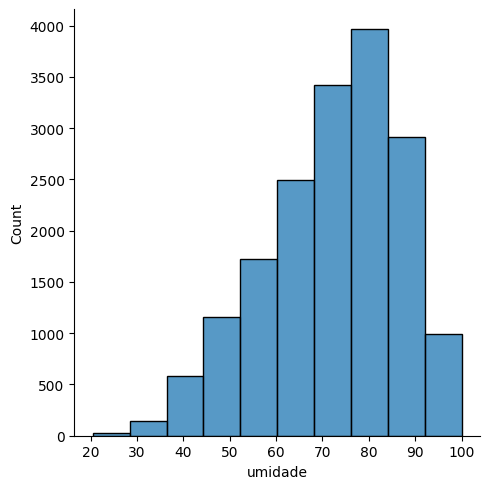

In [26]:
sns.displot(df_limpo,x='umidade', bins=10)
plt.show()

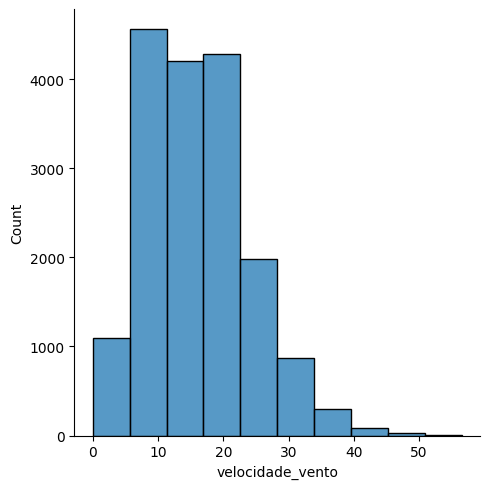

In [27]:
sns.displot(df_limpo,x='velocidade_vento', bins=10)
plt.show()

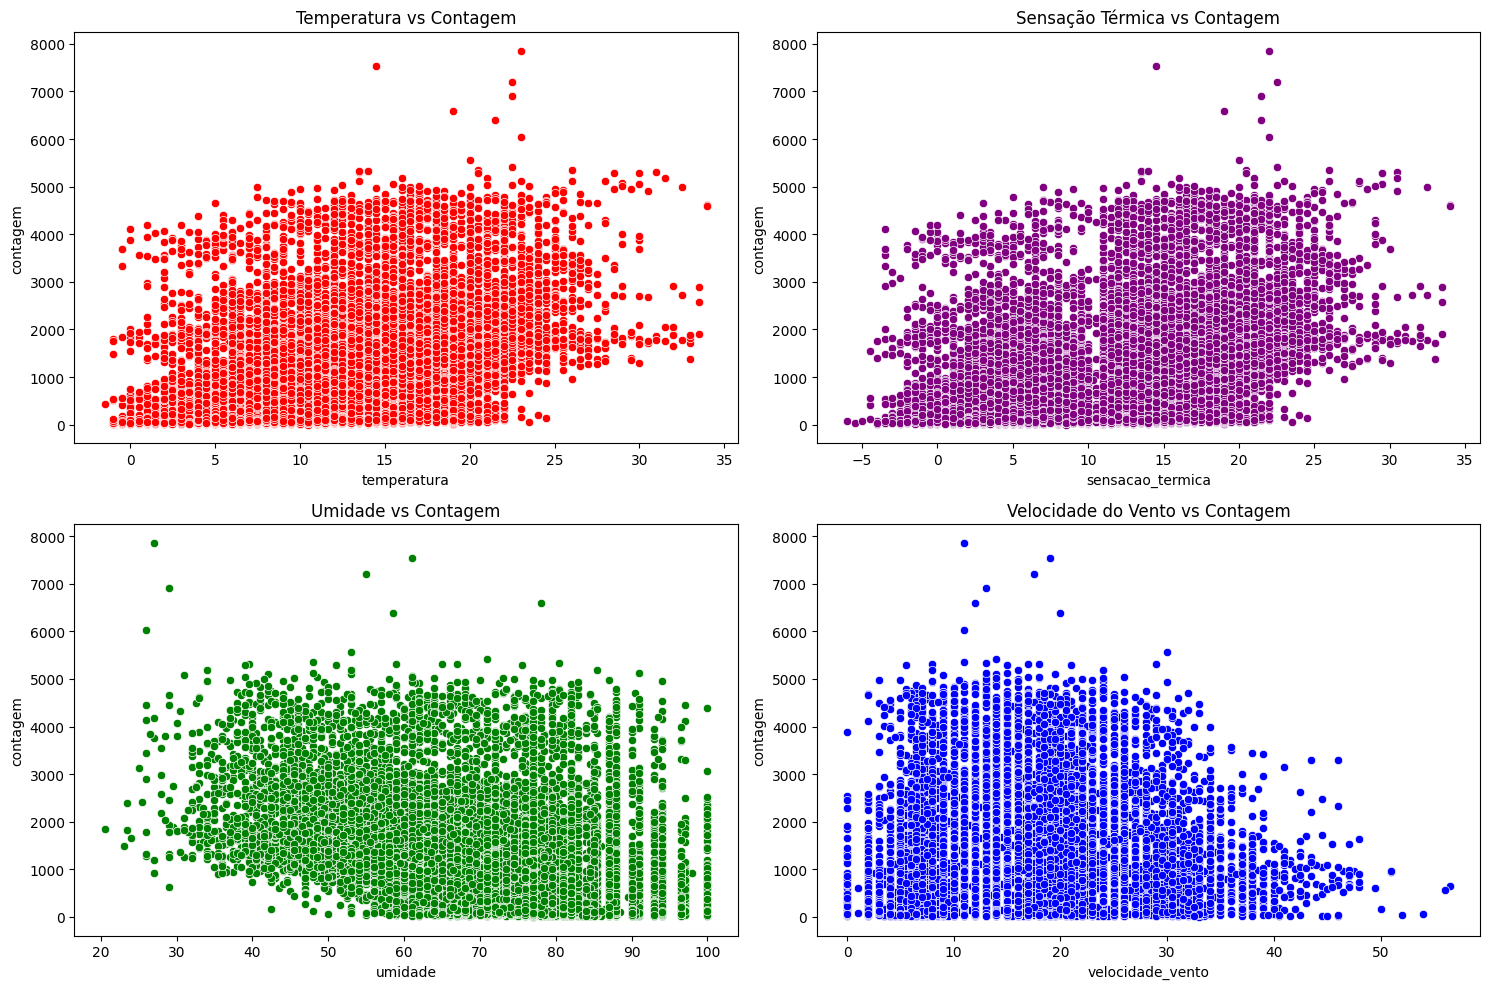

In [28]:
fig, axes = plt.subplots(2,2, figsize=(15,10))

sns.scatterplot(data=df_limpo, x='temperatura',y='contagem', ax=axes[0,0], color="red")
axes[0,0].set_title('Temperatura vs Contagem')


sns.scatterplot(data=df_limpo, x='sensacao_termica',y='contagem', ax=axes[0,1], color="purple")
axes[0,1].set_title('Sensação Térmica vs Contagem')


sns.scatterplot(data=df_limpo, x='umidade',y='contagem', ax=axes[1,0], color="green")
axes[1,0].set_title('Umidade vs Contagem')


sns.scatterplot(data=df_limpo, x='velocidade_vento',y='contagem', ax=axes[1,1], color="blue")
axes[1,1].set_title('Velocidade do Vento vs Contagem')

plt.tight_layout()
plt.show()

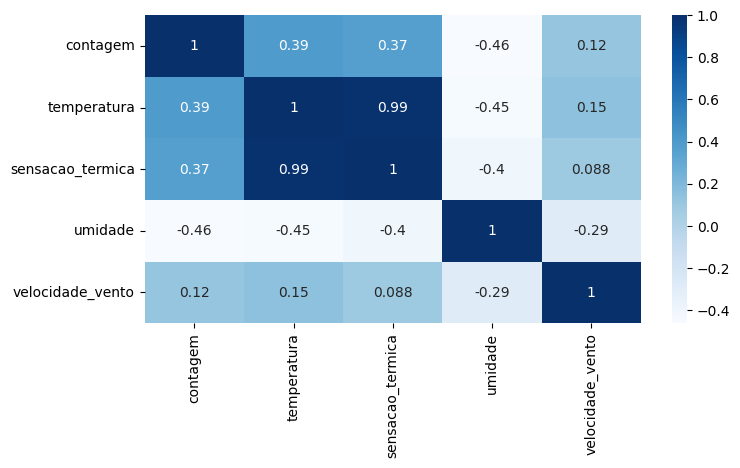

In [29]:
plt.figure(figsize=(8,4))

sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

# Explorando os dados categóricos

In [30]:
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [31]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
    print(f'Coluna: {col}')
    print(df_limpo[col].unique())
    print("="*15,'\n')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

Coluna: feriado
['Não' 'Sim']

Coluna: fim_de_semana
['Sim' 'Não']

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



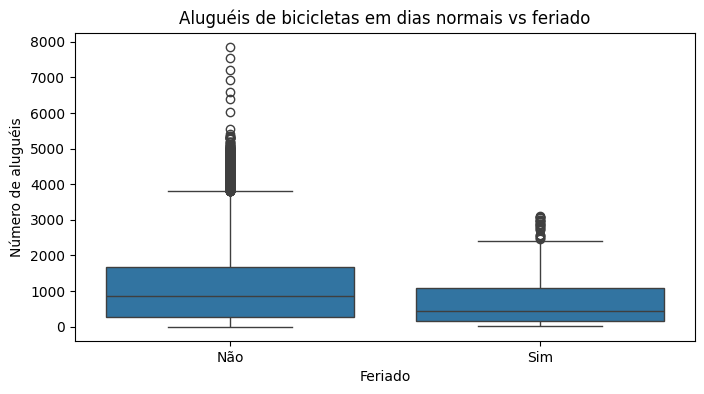

In [32]:
plt.figure(figsize=(8,4))

sns.boxplot(x="feriado",y="contagem", data=df_limpo)
plt.title("Aluguéis de bicicletas em dias normais vs feriado")
plt.xlabel("Feriado")
plt.ylabel("Número de aluguéis")
plt.show()

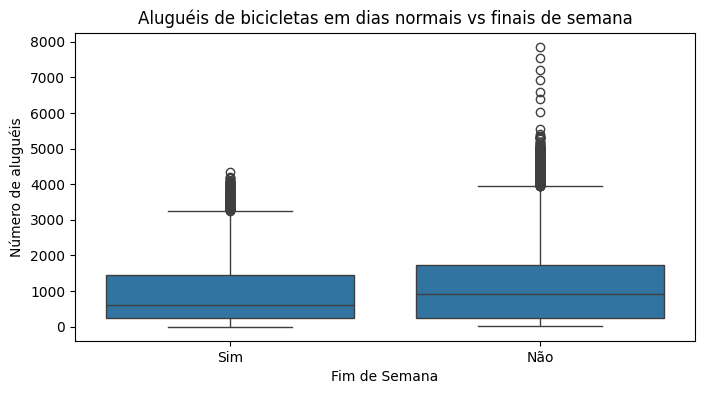

In [33]:
plt.figure(figsize=(8,4))

sns.boxplot(x="fim_de_semana",y="contagem", data=df_limpo)
plt.title("Aluguéis de bicicletas em dias normais vs finais de semana")
plt.xlabel("Fim de Semana")
plt.ylabel("Número de aluguéis")
plt.show()

In [34]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [35]:
mediana_feriado

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64

In [36]:
mediana_fim_de_semana

fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64

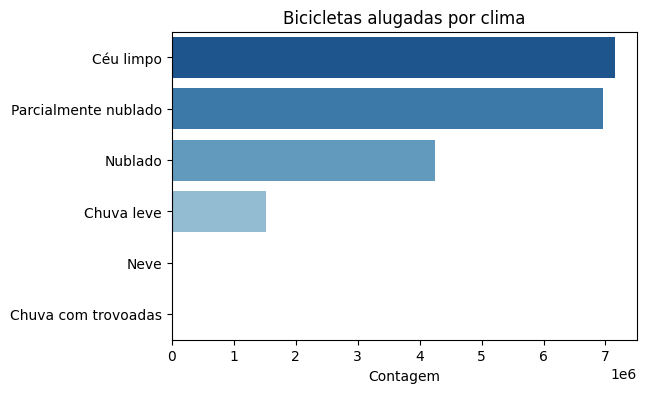

In [37]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem',ascending=False)

plt.figure(figsize=(6,4))

sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')

plt.title('Bicicletas alugadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

In [38]:
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


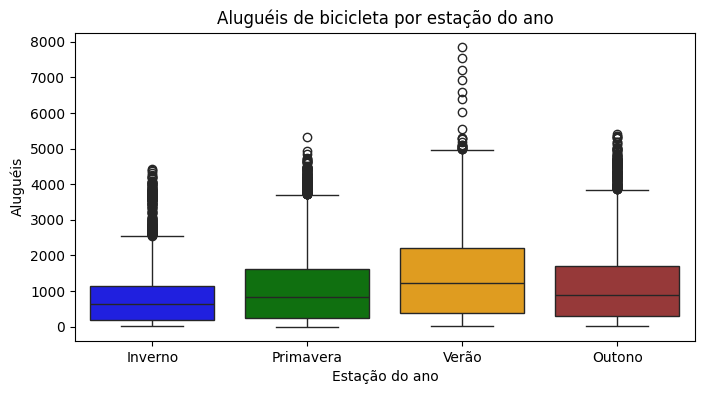

In [39]:
plt.figure(figsize=(8,4))


paleta_cores = {
    'Primavera': 'green',
    'Verão': 'orange',
    'Outono': 'brown',
    'Inverno': 'blue'
}

sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicleta por estação do ano')
plt.xlabel('Estação do ano')
plt.ylabel('Aluguéis')
plt.show()

In [40]:
df_limpo.groupby('estacao')['contagem'].median()

estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

In [41]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [42]:
from scipy.stats import mannwhitneyu

primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera,outono, alternative='two-sided')

u_statistic, p_value

(np.float64(9044682.5), np.float64(0.0004762100221646296))

# Analisando os dados ao longo do tempo

In [43]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [44]:
df_data = df_limpo.copy()

In [45]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])

df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [46]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [47]:
df_data['mes'] = df_data['data_hora'].dt.month
df_data['horario'] = df_data['data_hora'].dt.hour

In [48]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [49]:
df_data['data_hora'] = df_data['data_hora'].dt.date

df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [50]:
df_data = df_data.rename(columns={ 'data_hora': 'data' })

df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [51]:
df_data['data'] = pd.to_datetime(df_data['data'])

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 1.6+ MB


In [52]:
df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


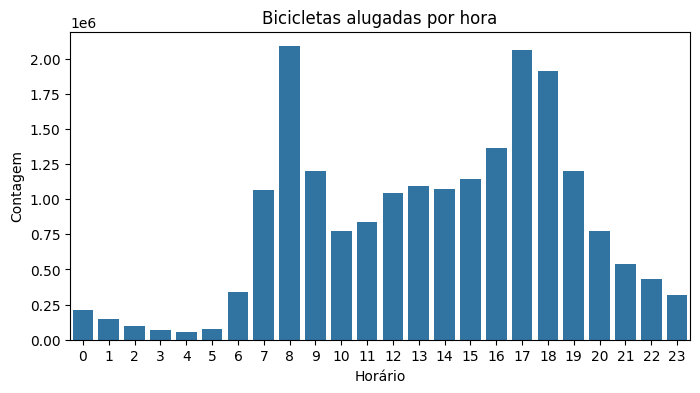

In [53]:
df_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))

sns.barplot(data=df_hora, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.show()

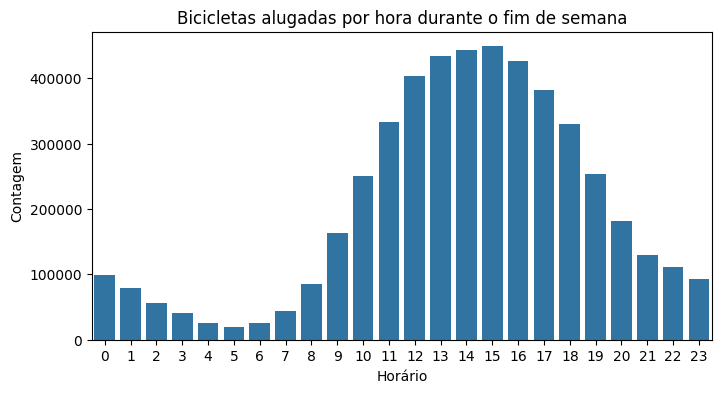

In [54]:
df_fim_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']

alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))

sns.barplot(data=alugueis_fim_de_semana, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora durante o fim de semana')
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.show()

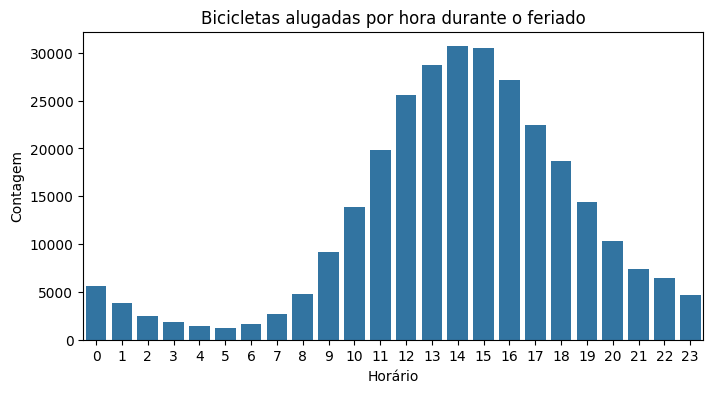

In [55]:
df_feriado = df_data[df_data['feriado'] == 'Sim']

alugueis_feriado = df_feriado.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))

sns.barplot(data=alugueis_feriado, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora durante o feriado')
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.show()

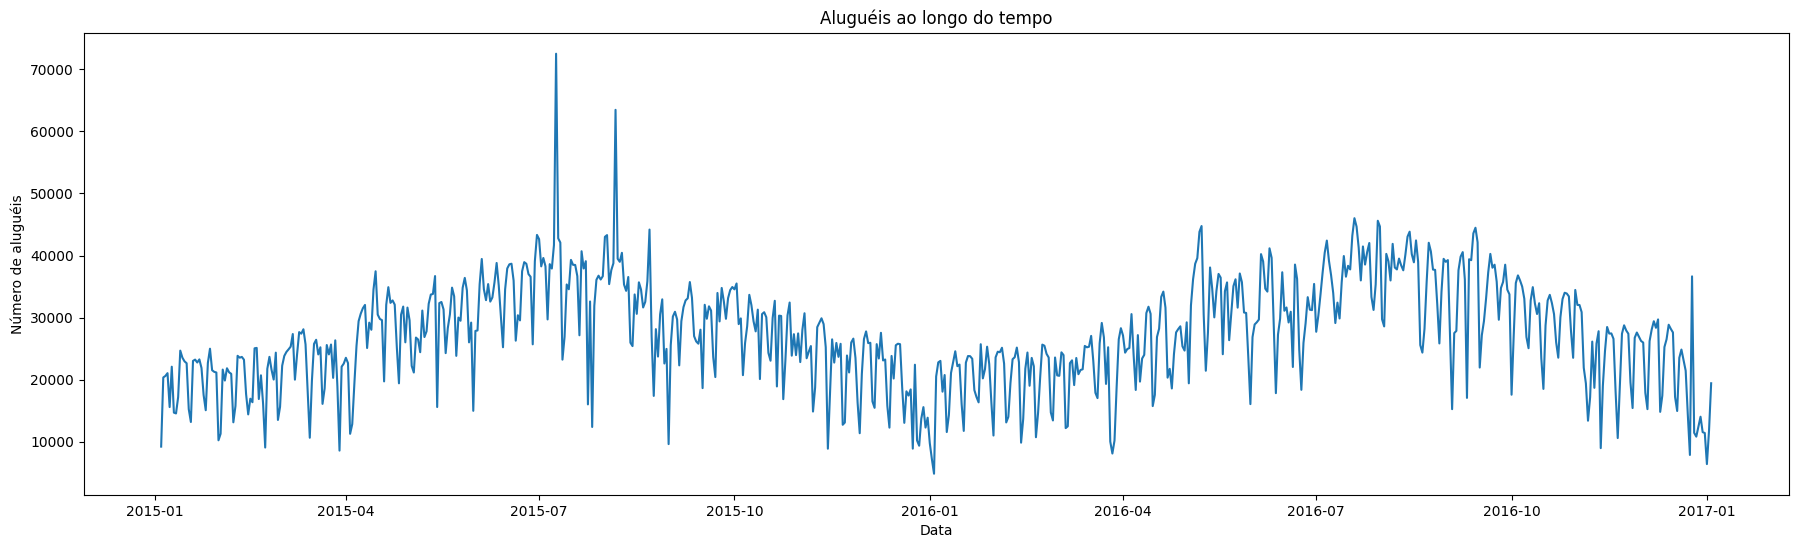

In [56]:
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()


plt.figure(figsize=(22,6))

sns.lineplot(data=df_tempo, x='data', y='contagem')
plt.title('Aluguéis ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')
plt.show()

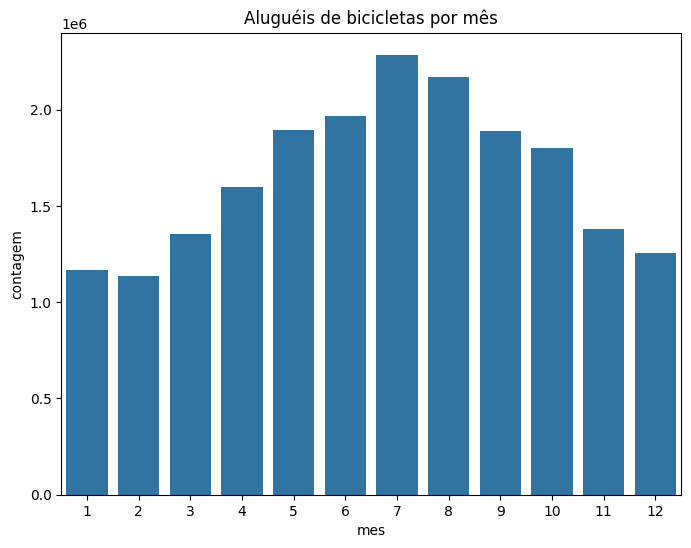

In [57]:
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

plt.figure(figsize=(8,6))

sns.barplot(data=alugueis_mensais, x='mes', y='contagem')
plt.title('Aluguéis de bicicletas por mês')
plt.show()

# Construindo um modelo preditivo

In [58]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [59]:
from prophet import Prophet

In [60]:
df_prophet = df_data[['data','contagem']].rename(columns={ 'data': 'ds', 'contagem': 'y' })

df_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [61]:
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()

df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [62]:
import numpy as np

np.random.seed(4587)

modelo = Prophet()

modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=90, freq='D')

previsao = modelo.predict(futuro)

18:23:43 - cmdstanpy - INFO - Chain [1] start processing
18:23:44 - cmdstanpy - INFO - Chain [1] done processing


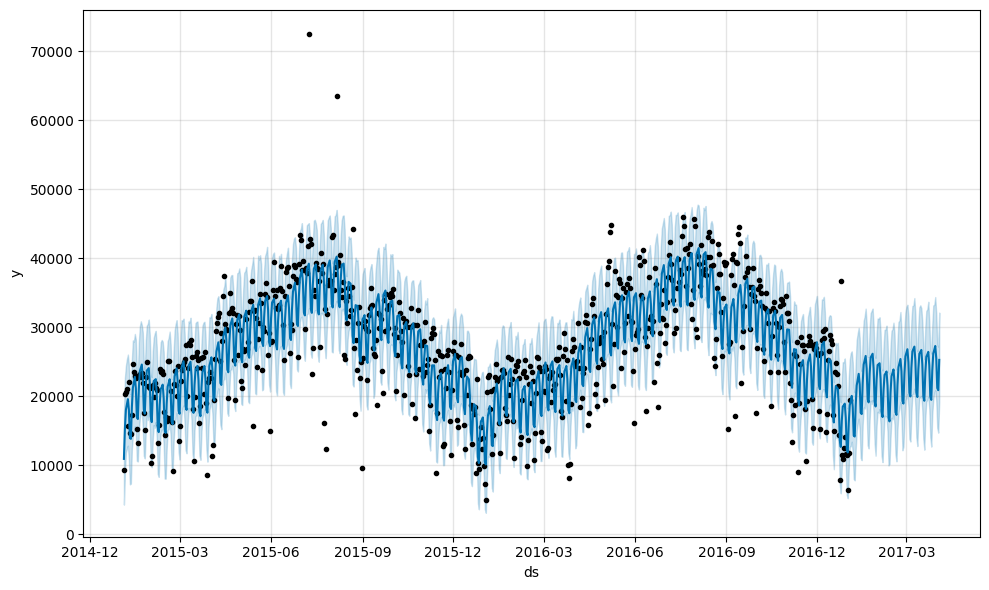

In [63]:
fig1 = modelo.plot(previsao)

In [64]:
previsao[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


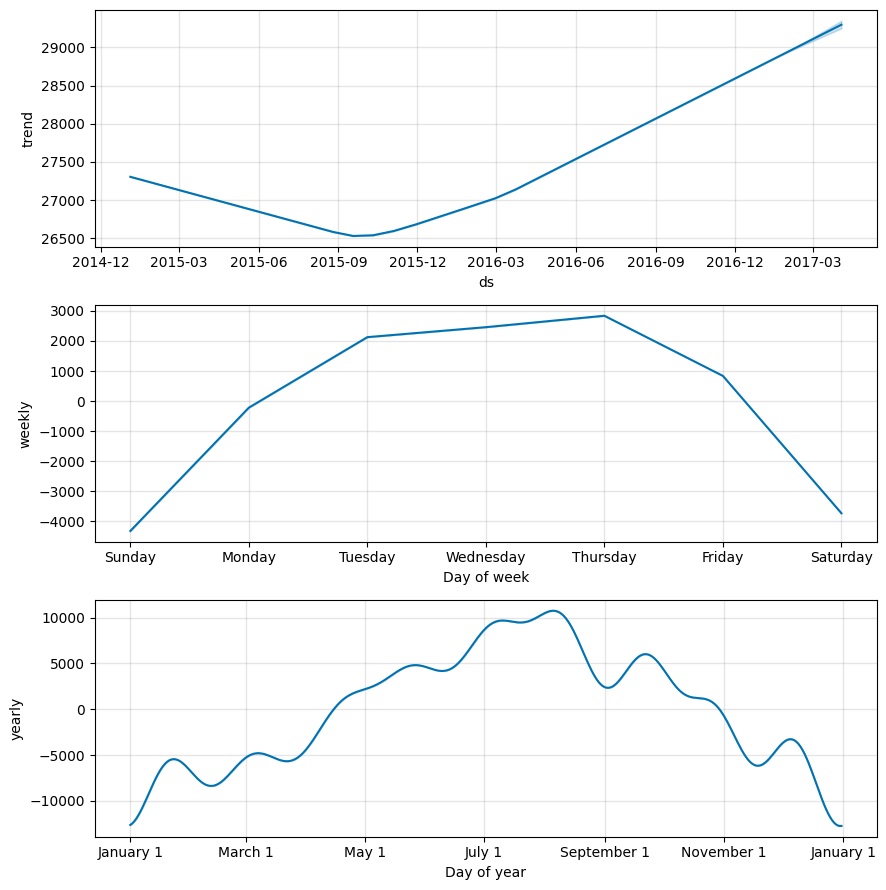

In [65]:
fig2 = modelo.plot_components(previsao)

In [66]:
df_prophet.shape

(730, 2)

In [67]:
df_treino = pd.DataFrame()

df_treino['ds'] = df_prophet['ds'][:584]
df_treino['y'] = df_prophet['y'][:584]

In [68]:
df_teste = pd.DataFrame()

df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]

In [69]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_treino)

futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

18:23:45 - cmdstanpy - INFO - Chain [1] start processing
18:23:45 - cmdstanpy - INFO - Chain [1] done processing


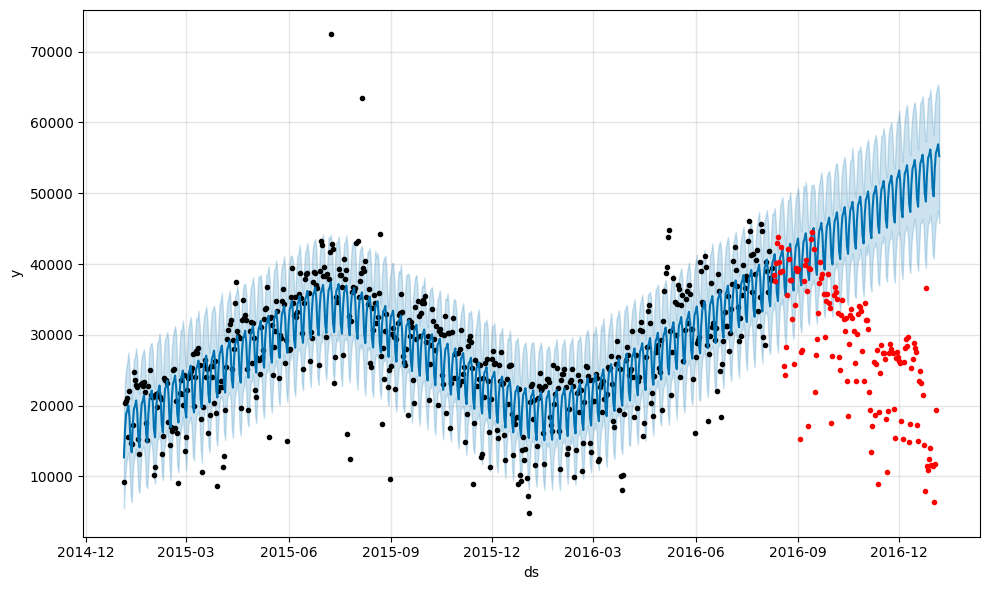

In [70]:
fig1 = modelo.plot(previsao)

plt.plot(df_teste['ds'], df_teste['y'],'.r')

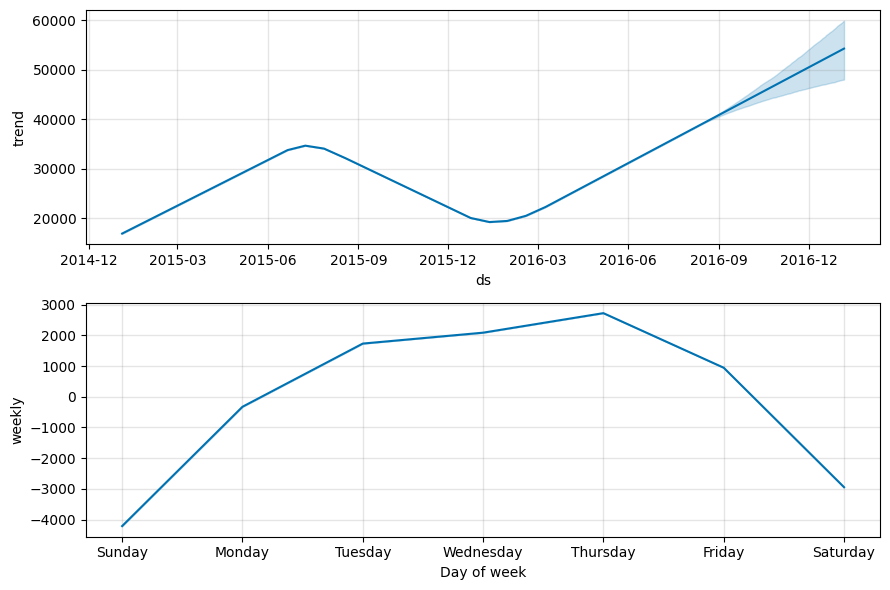

In [71]:
fig2 = modelo.plot_components(previsao)

In [72]:
df_previsao = previsao[['ds','yhat']]

df_comparacao = pd.merge(df_previsao, df_teste, on='ds')

df_comparacao

,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848
...,...,...,...
141,2016-12-30,54505.511686,11566
142,2016-12-31,50724.596343,11424
143,2017-01-01,49565.561539,6421
144,2017-01-02,53551.536790,11823


In [73]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 466132050.6184666, RMSE: 21590.09149166503


# Melhorando as previsões

In [75]:
np.random.seed(4587)

modelo = Prophet(
    yearly_seasonality=True
)
modelo.fit(df_treino)

futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

18:23:48 - cmdstanpy - INFO - Chain [1] start processing
18:23:48 - cmdstanpy - INFO - Chain [1] done processing


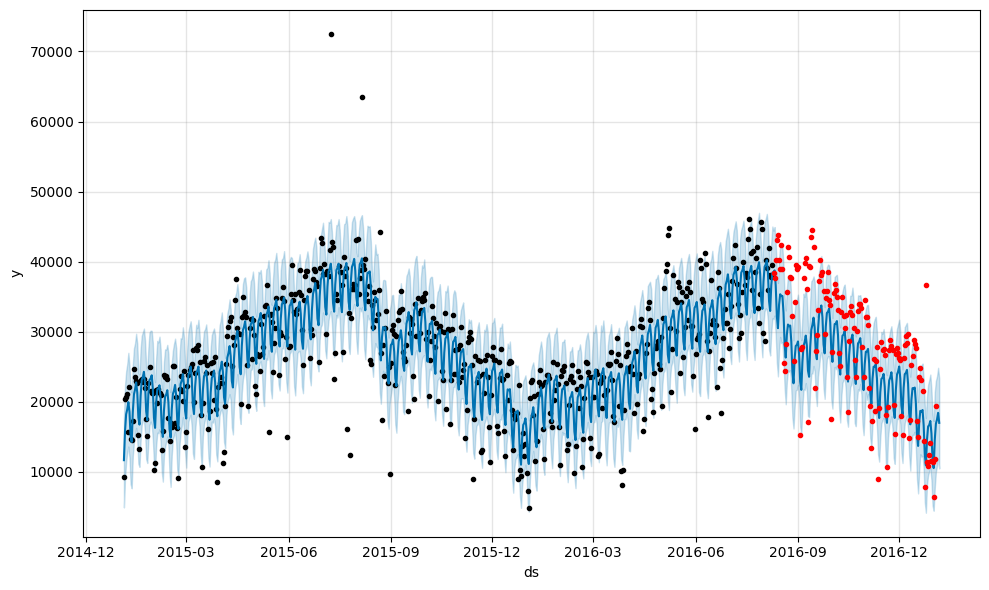

In [76]:
fig1 = modelo.plot(previsao)

plt.plot(df_teste['ds'], df_teste['y'], '.r')

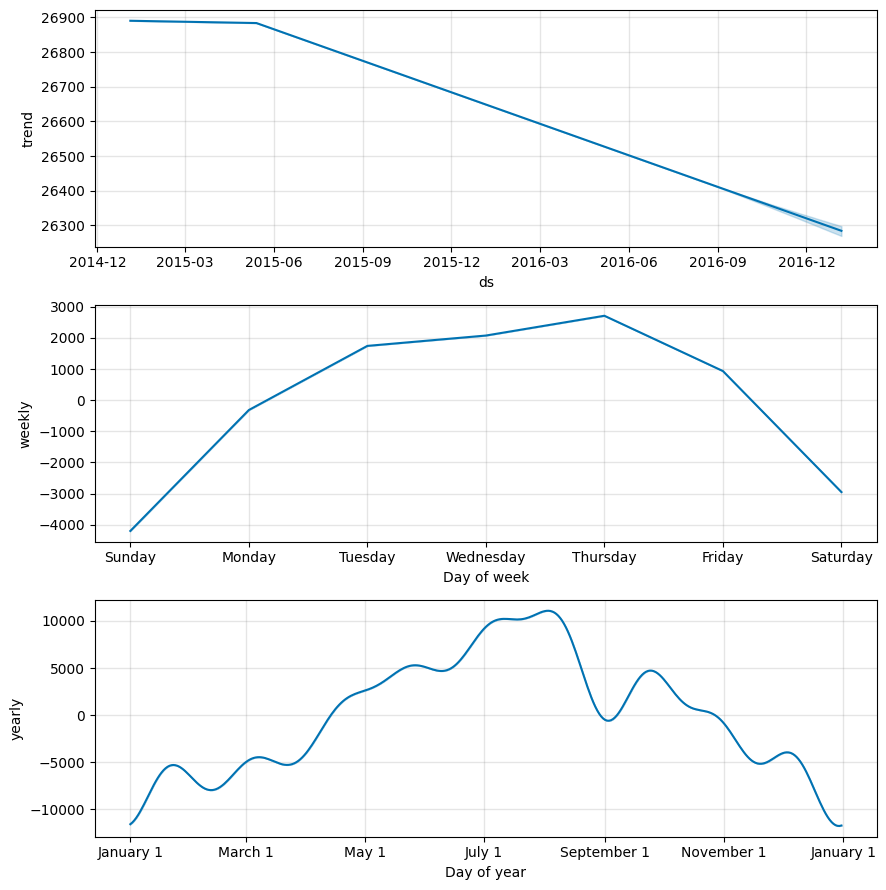

In [77]:
fig2 = modelo.plot_components(previsao)

In [78]:
df_previsao = previsao[['ds','yhat']]

df_comparacao = pd.merge(df_previsao, df_teste, on='ds')

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 38623883.499975376, RMSE: 6214.8116222437


In [79]:
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [80]:
np.random.seed(4587)

modelo = Prophet()

modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=0)

previsao = modelo.predict(futuro)

18:23:49 - cmdstanpy - INFO - Chain [1] start processing
18:23:49 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

In [82]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [83]:
df_treino = pd.DataFrame()

df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [84]:
df_teste = pd.DataFrame()

df_teste['ds'] = sem_outliers['ds'][505:]
df_teste['y'] = sem_outliers['y'][505:]

In [85]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(
    yearly_seasonality=True
)

modelo_sem_outliers.fit(df_treino)

futuro = modelo_sem_outliers.make_future_dataframe(periods=150,freq='D')

previsao = modelo_sem_outliers.predict(futuro)

18:23:49 - cmdstanpy - INFO - Chain [1] start processing
18:23:49 - cmdstanpy - INFO - Chain [1] done processing


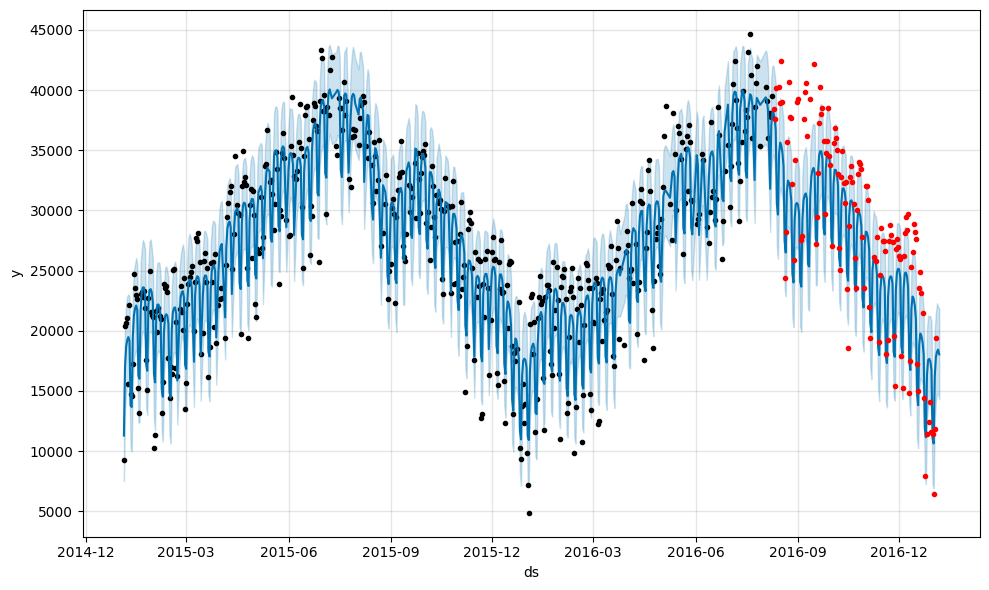

In [86]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [87]:
df_previsao = previsao[['ds','yhat']]

df_comparacao = pd.merge(df_previsao, df_teste, on='ds')

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 15672925.764235971, RMSE: 3958.904616713564


In [88]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(
    yearly_seasonality=True
)

modelo_sem_outliers.fit(df_treino)

futuro = modelo_sem_outliers.make_future_dataframe(periods=365,freq='D')

previsao = modelo_sem_outliers.predict(futuro)

18:23:50 - cmdstanpy - INFO - Chain [1] start processing
18:23:50 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [90]:
%matplotlib inline

In [91]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=[1, 2, 3], y=[10, 20, 30]))
fig.show()

In [92]:
from prophet.plot import plot_plotly

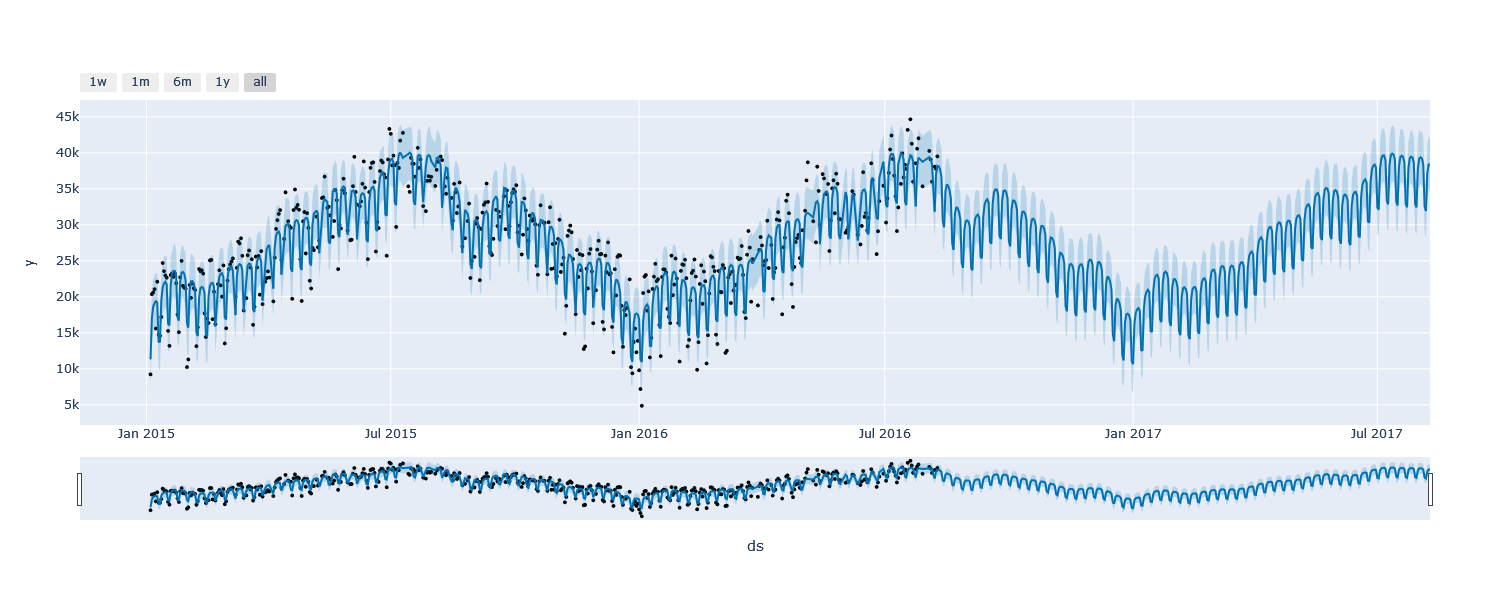

In [93]:
fig = plot_plotly(modelo_sem_outliers,previsao)
fig.show()